# 13

In [140]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [141]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [142]:
Weekly=load_data('Weekly')

Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


## (a):TODO:Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [143]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [144]:
Weekly.groupby('Direction').describe()

/tmp/ipykernel_27400/2708989981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Weekly.groupby('Direction').describe()


Year                                                         \
           count         mean       std     min     25%     50%     75%   
Direction                                                                 
Down       484.0  2000.198347  6.001890  1990.0  1995.0  2000.0  2005.0   
Up         605.0  1999.928926  6.060395  1990.0  1995.0  2000.0  2005.0   

                    Lag1            ...    Volume            Today            \
              max  count      mean  ...       75%       max  count      mean   
Direction                           ...                                        
Down       2010.0  484.0  0.282295  ...  2.019929  9.328214  484.0 -1.746585   
Up         2010.0  605.0  0.045217  ...  2.089900  8.403358  605.0  1.667086   

                                                               
                std     min      25%     50%      75%     max  
Direction                                                      
Down       1.759718 -18.195 -2.29275 -1.3345 -0.59175  -0.002  
Up         1.530535   0.010  0.63000  1.2470  2.21500  12.026  

[2 rows x 64 columns]

array([[<Axes: xlabel='Lag1', ylabel='Lag1'>,
        <Axes: xlabel='Lag2', ylabel='Lag1'>,
        <Axes: xlabel='Lag3', ylabel='Lag1'>,
        <Axes: xlabel='Lag4', ylabel='Lag1'>,
        <Axes: xlabel='Lag5', ylabel='Lag1'>,
        <Axes: xlabel='Volume', ylabel='Lag1'>,
        <Axes: xlabel='Today', ylabel='Lag1'>],
       [<Axes: xlabel='Lag1', ylabel='Lag2'>,
        <Axes: xlabel='Lag2', ylabel='Lag2'>,
        <Axes: xlabel='Lag3', ylabel='Lag2'>,
        <Axes: xlabel='Lag4', ylabel='Lag2'>,
        <Axes: xlabel='Lag5', ylabel='Lag2'>,
        <Axes: xlabel='Volume', ylabel='Lag2'>,
        <Axes: xlabel='Today', ylabel='Lag2'>],
       [<Axes: xlabel='Lag1', ylabel='Lag3'>,
        <Axes: xlabel='Lag2', ylabel='Lag3'>,
        <Axes: xlabel='Lag3', ylabel='Lag3'>,
        <Axes: xlabel='Lag4', ylabel='Lag3'>,
        <Axes: xlabel='Lag5', ylabel='Lag3'>,
        <Axes: xlabel='Volume', ylabel='Lag3'>,
        <Axes: xlabel='Today', ylabel='Lag3'>],
       [<Axes: xlabel=

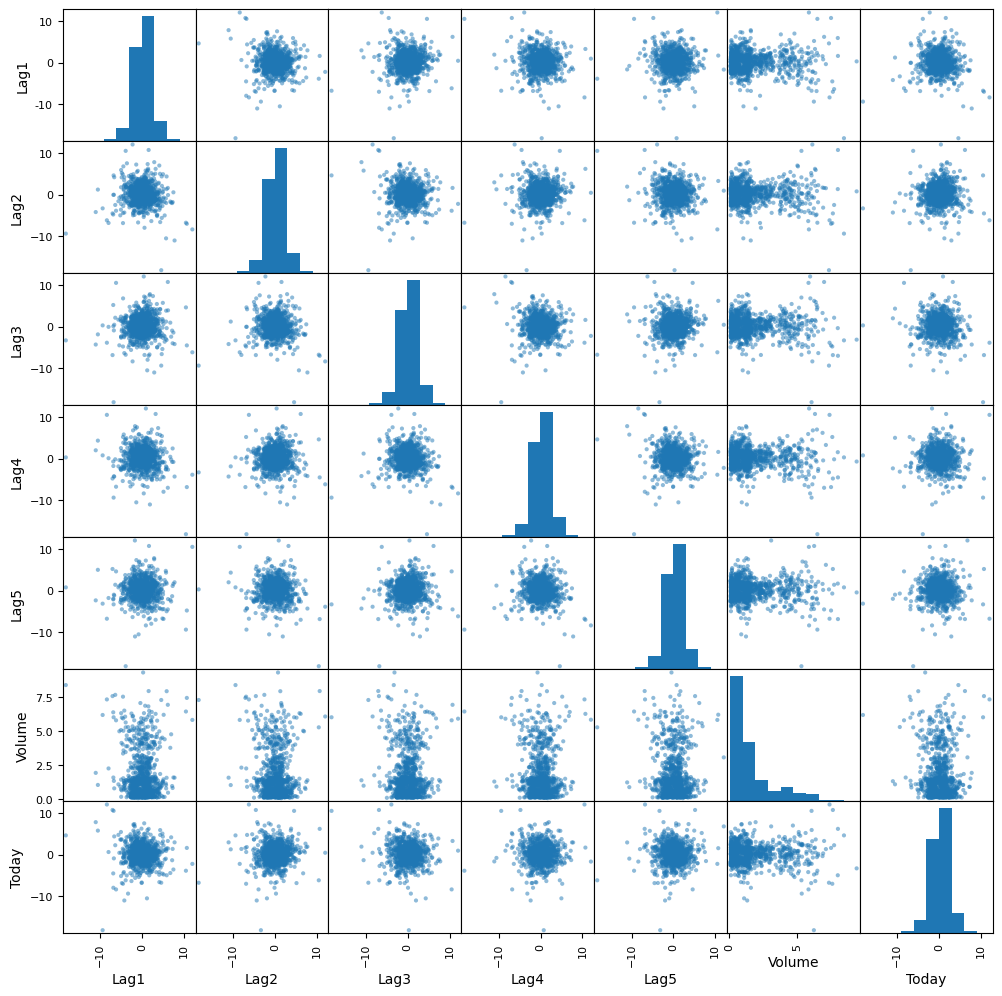

In [145]:
pd.plotting.scatter_matrix(Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']], 
                           figsize=(12, 12))

<Axes: >

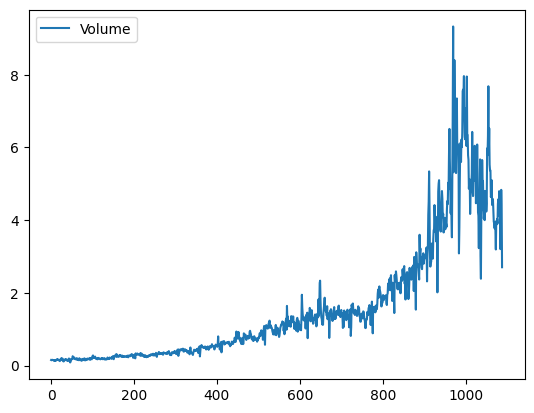

In [146]:
Weekly.plot(y='Volume')

## (b)TODO: Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [147]:
allvars=Weekly.columns.drop(['Year','Direction','Today'])
design=MS(allvars)

X=design.fit_transform(Weekly)
y=Weekly.Direction=='Up'

glm=sm.GLM(y,X,family=sm.families.Binomial())

result=glm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sun, 02 Nov 2025   Deviance:                       1486.4
Time:                        23:40:46   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

## Lag2 appears to be statistically significant.

## (c):TODO Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [148]:
probs=result.predict()
probs

array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163], shape=(1089,))

In [149]:
labels=np.array(['Down']*1089)
labels[probs>0.5]="Up"

confusion_table(labels,Weekly.Direction)





Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


## 91.7% of all predictions are 'up'.

## (d):Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [150]:
train=(Weekly.Year<=2008)
design_lag2=MS(['Lag2'])
X_train=design_lag2.fit_transform(Weekly[train])
X_test=design_lag2.fit_transform(Weekly[~train])
X_train,X_test=[M.drop(columns=['intercept']) for M in [X_train,X_test]]
y_train,y_test=y[train],y[~train]

glm=sm.GLM(y_train,X_train,family=sm.families.Binomial())

result=glm.fit()

probs=result.predict(exog=X_test)

probs


985     0.473327
986     0.604717
987     0.430515
988     0.429436
989     0.466450
          ...   
1084    0.500676
1085    0.486466
1086    0.546547
1087    0.520131
1088    0.504450
Length: 104, dtype: float64

In [151]:
D=Weekly.Direction
L_train,L_test=D[train],D[~train]

In [152]:
labels=np.array(['Down']*104)
labels[probs>0.5]='Up'
confusion_table(labels,L_test)

Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [153]:
np.mean(labels==L_test)

np.float64(0.5480769230769231)

## (e):TODO Repeat (d) using LDA.

In [154]:
lda=LDA(store_covariance=True)


In [155]:
lda.fit(X_train,L_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


In [156]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [157]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [158]:
lda_pred=lda.predict(X_test)

In [159]:
confusion_table(lda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [160]:
np.mean(lda_pred==L_test)

np.float64(0.625)

## (f):TODO Repeat (d) using QDA.

In [161]:
qda=QDA(store_covariance=True)

qda.fit(X_train,L_train)

,priors,None
,reg_param,0.0
,store_covariance,True
,tol,0.0001


In [162]:
qda.means_,qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [163]:
qda.covariance_[0]

array([[4.83781758]])

In [164]:
qda_pred=qda.predict(X_test)

confusion_table(qda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [165]:
np.mean(qda_pred==L_test)

np.float64(0.5865384615384616)

## (g):TODO Repeat (d) using KNN with K=1.

In [166]:
knn1=KNeighborsClassifier(n_neighbors=1)

knn1.fit(X_train,L_train)

knn1_pred=knn1.predict(X_test)

confusion_table(knn1_pred,L_test)

Truth,Down,Up
Predicted,,
Down,22,32
Up,21,29


In [167]:
np.mean(knn1_pred==L_test)

np.float64(0.49038461538461536)

## (h):TODO Repeat (d) using naive Bayes.

In [168]:
NB=GaussianNB()

NB.fit(X_train,L_train)

,priors,None
,var_smoothing,1e-09


In [169]:
nb_labels=NB.predict(X_test)
confusion_table(nb_labels,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [170]:
np.mean(nb_labels==L_test)

np.float64(0.5865384615384616)

## (i) TODO:Which of these methods appears to provide the best results on this data?

## LDA is the best, since it has the accuracy of 62.5%